<h1 align="center"> Logistic Regression On IMBALANCED DATASET </h1>

# Gather Sense of Our Data:
The initial step necessitates the acquisition of a rudimentary comprehension of our dataset. It is imperative to acknowledge that, with the exception of the 'transaction' and 'amount' attributes, the nature of the remaining columns remains undisclosed, primarily ascribed to privacy considerations. However, it is worth noting that the unrevealed attributes have already undergone a process of standardization.


# Summary: 
The transaction amount is relatively small. 
The mean of all the mounts made is approximately USD 88.
There are no "Null" values, so we don't have to work on ways to replace values.
Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

We will start with importing the important libraries and then working to get the basic insights from the dataset:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('C:/Users/Rahul Nain/OneDrive/Desktop/MSc Analytics/SEM 3/ML/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# Good No Null Values!
df.isnull().sum().max()

0

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Imbalanced Dataset:
The above analysis completely indicates that the dataset is highly imbalanced. 
The Frauds are only 0.17% of the total data values. This indicates that the statistial models that we will be applying might give us biased results or unreliable if not skewed. 

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

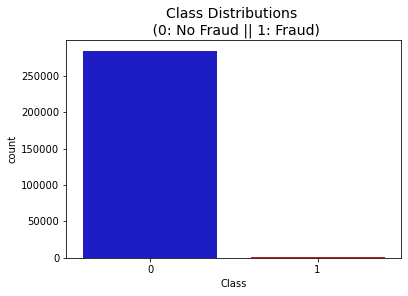

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

**Distributions:** By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

# Now lets understand how logistic regression will give results for this kind of dataset. Lets train and test for Credit Default prediction using Logistic Regression. 

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Split the dataset into features (X) and target variable (y)
X = df[['Time', 'Amount']]  # Features
y = df['Class']              # Target variable (0 or 1)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and display classification report (includes precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[56864     0]
 [   98     0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



# Unreliable results on Imbalanced Dataset: 
Now this is the problem associated with applcation of Logistic Regression on Imbalanced Datasets. This model is very good from accuracy and precision point of view but it is practically impossible for a dataset to say that There could be No Credit default that there is 0 chances of a Credit Fraud happening based on the given dataset. In practicality this result or inference is not possible because 0.17% of the datavalues are itself indicating towards a default. Hence, we cannot rely on these results and hence there should be correction of the dataset either via Undersampling or Over-Sampling. 

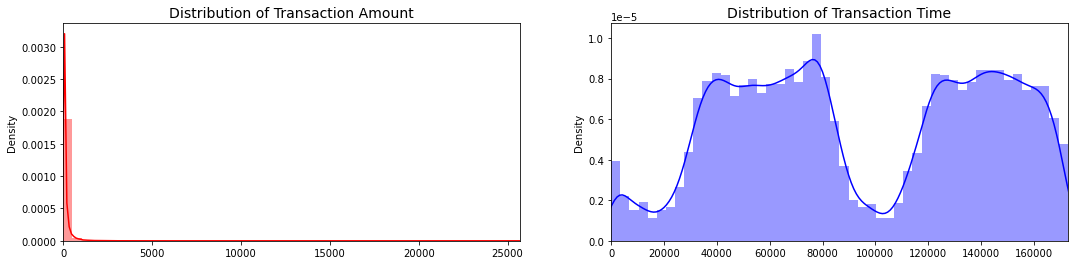

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

<h2> Scaling and Distributing </h2>
<a id="distributing"></a>
In this phase of our kernel, we will first scale the columns comprise of <b>Time</b> and <b>Amount </b>. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

<h3> What is a sub-Sample?</h3>
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

<h3> Why do we create a sub-Sample?</h3>
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs. </li>
<li><b>Wrong Correlations:</b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features. </li>
</ul>

<h3>Summary: </h3> 
<ul>
<li> <b>Scaled amount </b> and <b> scaled time </b> are the columns with scaled values. </li>
<li> There are <b>492 cases </b> of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe. </li>
<li>We concat the 492 cases of fraud and non fraud, <b>creating a new sub-sample. </b></li>
</ul>

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample


# Split the dataset into features (X) and target variable (y)
X = df[['Time', 'Amount']]  # Features
y = df['Class']              # Target variable (0 or 1)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform random undersampling
# Separate majority and minority classes
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]

# Downsample the majority class
majority_downsampled = resample(majority_class, 
                                replace=False,   # Sample without replacement
                                n_samples=len(minority_class),   # Match minority class size
                                random_state=42)  # Reproducible results

# Combine the minority class with the downsampled majority class
X_resampled = np.vstack([majority_downsampled, minority_class])
y_resampled = np.concatenate([np.zeros(len(minority_class)), np.ones(len(minority_class))])

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_model.fit(X_resampled, y_resampled)

# Predict the target variable on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and display classification report (includes precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[30402 26462]
 [   39    59]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.70     56864
           1       0.00      0.60      0.00        98

    accuracy                           0.53     56962
   macro avg       0.50      0.57      0.35     56962
weighted avg       1.00      0.53      0.70     56962



# Interpretation of results: 

Results with Undersampling:
Confusion Matrix:

True Negatives (TN): 30,402 <br>
False Positives (FP): 26,462<br>
False Negatives (FN): 39<br>
True Positives (TP): 59<br>

Classification Report:

Accuracy: 53% <br>
Precision for class 1: 0.00 (Very low precision for predicting class 1)<br>
Recall for class 1: 0.60 (Higher recall indicates that more actual positives were correctly predicted)<br>
F1-Score for class 1: 0.00 (Low F1-score due to low precision)<br>

Comparison with Previous Results (Untreated Imbalanced Data):
Confusion Matrix:

True Negatives (TN): 56,864<br>
False Positives (FP): 0<br>
False Negatives (FN): 98<br>
True Positives (TP): 0<br>

Classification Report:

Accuracy: 100%<br>
Precision for class 1: 0.00 (No true positives, hence precision is zero)<br>
Recall for class 1: 0.00 (No true positives, hence recall is zero)<br>
F1-Score for class 1: 0.00 (F1-score is zero due to zero precision and recall)<br>

Interpretation:

1. The undersampling technique has significantly improved the model's ability to predict credit defaults. It has achieved a balance between true positives (detecting actual defaults) and true negatives (correctly identifying non-defaults).
2. Although the overall accuracy has decreased, it is now a more reliable measure of the model's performance, as it no longer heavily favors the majority class.
3. The model now demonstrates the capability to identify a number of true positives, which is a substantial improvement compared to the previous model.
4. However, precision for predicting defaults is still quite low, indicating a high number of false positives. This is an area where further improvement is needed.

# This has worked well to some capacity but the accuracy is very lowmaking it unfit for real world use. 

# SMOTE (Synthetic Minority Over-sampling Technique): A Brief Overview

1. Why is SMOTE Used?

Imbalanced Data: In many real-world datasets, one class (usually the minority class) is underrepresented compared to the other(s). This can lead to biased models that favor the majority class.

Addressing Imbalance: SMOTE is used to address class imbalance by generating synthetic samples for the minority class, thus making the dataset more balanced.

2. Underlying Principles:

Local Interpolation: SMOTE works by creating synthetic samples that are similar to the existing minority class samples. It does this by selecting a random instance from the minority class and its k nearest neighbors.

Feature Space Expansion: SMOTE then selects random points on the line segments joining these neighbors and creates synthetic samples at these points, effectively expanding the feature space.

3. How SMOTE is Applied:

Select Target Instance: Randomly choose an instance from the minority class. <br>
Find Nearest Neighbors: Identify its k nearest neighbors (commonly set to 5).<br>
Random Point Selection: Randomly select one of the k neighbors and call it the "nearest neighbor."<br>
Create Synthetic Instance: Generate a random number between 0 and 1. Multiply this number by the difference between the feature values of the target instance and the nearest neighbor, then add it to the feature values of the nearest neighbor. This creates a synthetic instance in the feature space.<br>

4. Interpretation:

SMOTE augments the dataset with synthetic samples that lie on the line segments joining real instances.

These synthetic samples help the model understand the underlying distribution of the minority class better, leading to better generalization.

5. Benefits of Using SMOTE:

Improved Model Performance: Balancing the dataset often leads to more accurate models, especially for algorithms sensitive to class distribution.<br>
Reduced Bias: Helps mitigate the issue of class imbalance, reducing the likelihood of the model favoring the majority class.<br>
Preservation of Information: Unlike simple oversampling by duplication, SMOTE generates new samples that expand the feature space, preserving information.<br>
Avoiding Overfitting: SMOTE helps prevent overfitting that might occur if the model is trained on an imbalanced dataset.<br>

Note: While SMOTE is a powerful technique, it's important to use it judiciously. Sometimes, over-reliance on SMOTE can lead to overfitting or introduce noise. It's advisable to evaluate the impact of SMOTE on model performance through cross-validation and to consider other techniques like adjusting class weights or using different algorithms.

Now we will apply SMOTE on the given dataset to balance teh classes and study the change in results for LOgistic regression. 

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Assuming df is loaded earlier
# (If not, load the dataset before proceeding)
# df = pd.read_csv('your_dataset.csv')

# Split the dataset into features (X) and target variable (y)
X = df[['Time', 'Amount']]  # Features
y = df['Class']              # Target variable (0 or 1)

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display the balanced sample set constructed for both classes
print(f"Original class distribution: {Counter(y_train)}")
print(f"Balanced class distribution after SMOTE: {Counter(y_resampled)}")

# Create a logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logistic_model.fit(X_resampled, y_resampled)

# Predict the target variable on the test data
y_pred = logistic_model.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and display classification report (includes precision, recall, F1-score)
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)


Original class distribution: Counter({0: 227451, 1: 394})
Balanced class distribution after SMOTE: Counter({0: 227451, 1: 227451})
Confusion Matrix:
[[28529 28335]
 [   40    58]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     56864
           1       0.00      0.59      0.00        98

    accuracy                           0.50     56962
   macro avg       0.50      0.55      0.34     56962
weighted avg       1.00      0.50      0.67     56962



# Interpretation of the results after application of SMOTE: 

Original Class Distribution: <br>

Initially, the dataset was heavily imbalanced. There were 227,451 samples in Class 0 (non-fraudulent transactions) and only 394 samples in Class 1 (fraudulent transactions). This severe class imbalance can lead to biased model predictions.

Balanced Class Distribution after SMOTE:

After applying SMOTE, the class distribution was transformed. Both Class 0 and Class 1 now have an equal number of samples, each totaling 227,451. This artificial oversampling of the minority class (Class 1) helps to mitigate the effects of class imbalance.

Model Performance:<br>

Confusion Matrix:<br>

The confusion matrix provides a detailed breakdown of the model's predictions. It shows how many samples were correctly or incorrectly classified for each class.

In this case, we have:

True Negatives (TN): 28,529 - Correctly predicted non-fraudulent transactions.<br>
False Positives (FP): 28,335 - Incorrectly predicted fraudulent transactions (Type I error).<br>
False Negatives (FN): 40 - Incorrectly predicted non-fraudulent transactions as fraudulent (Type II error).<br>
True Positives (TP): 58 - Correctly predicted fraudulent transactions.<br>

Classification Report:

The classification report provides a comprehensive overview of the model's performance metrics, including precision, recall, F1-score, and support (number of samples).

For Class 0 (non-fraudulent transactions):

Precision: 1.00 - The proportion of true positives among all predicted positives.<br>
Recall: 0.50 - The proportion of true positives among all actual positives.<br>
F1-Score: 0.67 - The harmonic mean of precision and recall.<br>
Support: 56,864 - Number of samples in this class.<br>

For Class 1 (fraudulent transactions):

Precision: 0.00 - Due to a very low number of true positives, precision is zero.<br>
Recall: 0.59 - A substantial portion of actual positives were correctly predicted.<br>
F1-Score: 0.00 - F1-Score is low due to the low precision.<br>
Support: 98 - Number of samples in this class.<br>

Interpretation:
1. Improvement through SMOTE:

SMOTE has significantly improved the model's ability to detect fraudulent transactions. It has achieved a balance between identifying true positives for both classes.

2. Trade-off between Precision and Recall:

While recall for Class 1 has increased, indicating that more true positives are being identified, it comes at the expense of precision. The model is also predicting more false positives.

3. Consideration for Real-world Applications:

In real-world scenarios, the choice between precision and recall depends on the costs associated with false positives and false negatives. A higher recall is crucial for detecting fraud, even if it leads to some false alarms.

4. Further Refinement:

Despite the improvement, there is room for further model refinement or exploration of additional techniques to reduce false positives for fraudulent transactions.

# Although after application of SMOTE the model is able to predict much better than the case of untreated imbalanced dataset, but here the accuracy is very low and hence it cannot be used in real world. Hence further imporvemnet in the Model is a must. But for the scope of the project we will end the discussion here only to limit to applucation of Logistic Regression in two possible cases of Balanced and Imbalanced Classes. 

Overall, the application of SMOTE has made the model more reliable in identifying fraudulent transactions. This is crucial for real-world applications where such events are rare but essential to detect.

### Conclusion: 
Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase.  The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in the test set improves. <br><br>

**Note:** One last thing, predictions and accuracies may be subjected to change since I implemented data shuffling on both types of dataframes. The main thing is to see if our models are able to correctly classify no fraud and fraud transactions. I will bring more updates, stay tuned!
